In [1]:
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import nltk                                   # Natural Language Tool Kit (영어).
import re
import os
import matplotlib.pyplot as plt
from PIL import Image                         # Pillow 패키지의 영상 핸들링 클래스.
from nltk.corpus import stopwords             # 불용어.

In [34]:
f = open("인스타그램 스터디카페1.txt",'r',encoding='UTF-8')
my_news = f.readlines()
f.close()

In [50]:
n_min = 2          # 최소 문자 개수.
n_max =  4
corpus = []
#lemmatizer = WordNetLemmatizer()
for a_line in my_news:
    pre = re.sub(r'\W', ' ', a_line)                                # 특수문자 제외.
    pre = re.sub(r'_', ' ', pre)                                    # 특수문자 제외.
    pre = re.sub(r'\d+','', pre)                                    # 수자 제외. 
    pre = nltk.word_tokenize(pre)
    pre = [x for x in pre if len(x) > n_min]                        # 최소 길이 충족.
    pre = [x for x in pre if len(x) < n_max] 
    pre = [x.lower() for x in pre]                                  # 소문자화.  정규화 (Normalization).
    pre = [x for x in pre if x not in stopwords.words('english')+['could']]   # 불용어 처리.
#    pre = [lemmatizer.lemmatize(x) for x in pre]                    # 원형 복원.
    corpus += pre                                                   # 단어를 말뭉치에 추가.

In [51]:
my_series = pd.Series(corpus)

In [52]:
# 도수 분포표. Top 10
my_word_counts = my_series.value_counts().sort_values(ascending=False)
my_word_counts[:10]

인베이    27
공스타    12
독서실    10
공시생     7
대학생     7
스터디     7
자격증     6
직장인     5
비허밍     5
좋아요     3
dtype: int64

In [53]:
# 딕셔너리로 변환해 둔다.
my_dict = {}
for an_index, a_value in zip(my_word_counts.index,my_word_counts.values):
    my_dict[an_index] = a_value

In [57]:
img = Image.open('background_3.png')                    # 하트.
#plt.imshow(img)
#plt.show()
back_mask = np.array(img)

FileNotFoundError: [Errno 2] No such file or directory: 'background_3.png'

#### 워드 클라우드 기본형 생성:

In [54]:
# 다음은 워드클라우드의 요구사항.
a_long_sentence = ' '.join(corpus)

In [55]:
wc = WordCloud(font_path = 'NanumBarunGothic.ttf',background_color='white', max_words=30)              # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)
#wc.generate_from_frequencies(my_dict)
#wc.words_

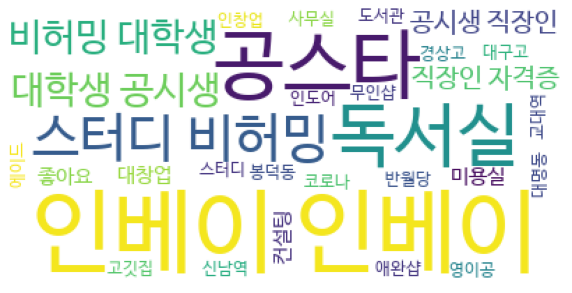

In [56]:
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")                                    # 축을 꺼줌.
plt.show()